In [1]:
import os
import fnmatch
import pandas as pd
from os.path import isfile, join
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Topological charge

    In this script I will analyze the topological charge in a Cairo Lattice if we increse linearly up from 0 mT to 50 mT with a rate of 0.0333 mT/s (1500 s). Then we are Analyzing the output data of Script-1.2.

In [2]:
data_directory = "/home/carolina/CairoLattice_ACI_PROJECT/Scripts/Output_Script-8.1"

In [3]:
#slope = 50/1500
#slope

In [4]:
Cairo = []
for file in os.listdir(data_directory):
    if fnmatch.fnmatch(file, 'ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp*.dat'):
        print(file)
        Cairo.append(pd.read_csv(join(data_directory,file), sep = "\t", index_col = [0,1])) 
        
keys_Cairo = []
for i in range(len(Cairo)):
    keys_Cairo.append(i)

ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp37.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp34.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp24.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp32.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp0.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp22.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp49.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp16.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp26.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp38.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp8.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp17.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp29.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp21.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp25.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp43.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp48.dat
ACI_CairoLattice_25mT-2500s_PeriodicBound_l10_exp1

In [5]:
Cairo_exp = pd.concat(Cairo, keys = keys_Cairo)

In [6]:
Cairo_exp.index.names = ['Exp', 'frame', 'id']

In [7]:
Cairo_exp

x           y  coordination  charge        dx  \
Exp frame  id                                                             
0   0      0       0.000000   -9.772898             3       1  0.000000   
           1       0.000000    9.772898             3       1  1.732051   
           2       0.000000 -473.292807             3       1 -1.732051   
           3      23.174375 -486.690558             4       0 -2.732051   
           4       0.000000 -453.747202             3       1  0.000000   
...                     ...         ...           ...     ...       ...   
49  250000 1232   92.704002 -639.155048             3       1 -1.732051   
           1233  658.700809 -602.575989             3       1  1.000000   
           1234  639.155115 -602.575989             3      -1  1.000000   
           1235  639.155315 -509.872009             3      -1  1.000000   
           1236  658.700703 -509.872009             3       1  1.000000   

                       dy  
Exp frame  id              
0   0      0     2.000000  
           1     1.000000  
           2    -1.000000  
           3    -0.732050  
           4    -2.000000  
...                   ...  
49  250000 1232  1.000000  
           1233 -1.732051  
           1234  1.732051  
           1235  1.732051  
           1236 -1.732051  

[15524350 rows x 6 columns]

In [8]:
Cairo_exp = Cairo_exp.query('coordination != 2')

In [9]:
Cairo_exp['time'] = (Cairo_exp.index.get_level_values('frame'))/100

/home/carolina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## 1. Total topological charge

In [10]:
Topo_q = Cairo_exp.groupby('time').sum()/Cairo_exp.groupby('time').count()

In [11]:
Topo_q

,x,y,coordination,charge,dx,dy
time,,,,,,
0.0,440.343968,-440.343965,3.310939,0.001275,0.008296,-0.007704
10.0,440.343968,-440.343965,3.310939,0.001309,0.008908,-0.007295
20.0,440.343968,-440.343965,3.310939,0.001206,0.008853,-0.007252
30.0,440.343968,-440.343965,3.310939,0.001068,0.009083,-0.007206
40.0,440.343968,-440.343965,3.310939,0.001068,0.008405,-0.007341
...,...,...,...,...,...,...
2460.0,440.343968,-440.343965,3.310939,-0.006718,0.002024,-0.001001
2470.0,440.343968,-440.343965,3.310939,-0.006546,-0.002790,-0.002146
2480.0,440.343968,-440.343965,3.310939,-0.007201,-0.002465,-0.000721


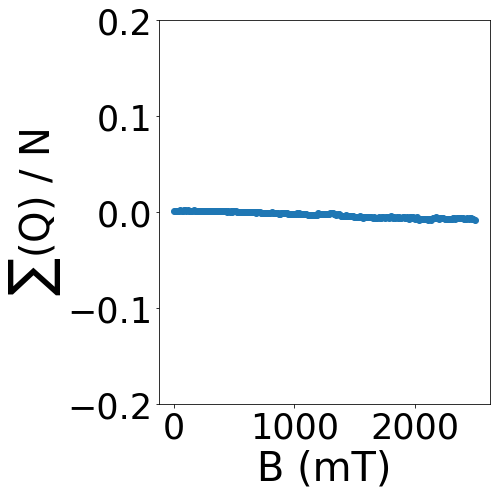

In [12]:
fig, ax1 = plt.subplots(figsize=(7,7))

plt.plot(Topo_q.index.get_level_values('time'), Topo_q.charge, 'o')

ax1.tick_params(axis='y', labelsize=35)
ax1.tick_params(axis='x', labelsize=35)  

ax1.set_xlabel('B (mT)', size = 40)
ax1.set_ylabel('$\sum$(Q) / N', size = 40)
ax1.set_ylim(-0.2,0.2)

plt.tight_layout()

### 2. Total topological charge of each sublattice

In [13]:
Cairo_exp.groupby(['time','coordination']).sum()


x             y  charge          dx  \
time   coordination                                                   
0.0    3             1.761376e+07 -1.761376e+07     -14  285.928275   
       4             7.948208e+06 -7.948207e+06      88  195.660323   
10.0   3             1.761376e+07 -1.761376e+07     -18  323.196224   
       4             7.948208e+06 -7.948207e+06      94  193.928272   
20.0   3             1.761376e+07 -1.761376e+07     -32  325.464174   
...                           ...           ...     ...         ...   
2480.0 4             7.948208e+06 -7.948207e+06    3432  -81.779427   
2490.0 3             1.761376e+07 -1.761376e+07   -3872   66.770547   
       4             7.948208e+06 -7.948207e+06    3424  -44.157665   
2500.0 3             1.761376e+07 -1.761376e+07   -3872  -80.942275   
       4             7.948208e+06 -7.948207e+06    3398  -85.353830   

                             dy  
time   coordination              
0.0    3            -326.898564  
       4            -120.290887  
10.0   3            -304.166514  
       4            -119.290887  
20.0   3            -303.166515  
...                         ...  
2480.0 4              30.392311  
2490.0 3            -175.870480  
       4             -57.621770  
2500.0 3             -99.803840  
       4              11.732054  

[502 rows x 5 columns]

In [14]:
df1 = Cairo_exp.groupby(['time','coordination']).sum()/Cairo_exp.groupby(['time','coordination']).count()


In [15]:
err = Cairo_exp.groupby(['time','coordination']).std()/np.sqrt(Cairo_exp.groupby(['time','coordination']).count())

In [16]:
df = df1['charge'].to_frame()
df['err'] = err['charge']

In [17]:
df

charge       err
time   coordination                    
0.0    3            -0.000350  0.008654
       4             0.004875  0.014844
10.0   3            -0.000450  0.008655
       4             0.005208  0.014843
20.0   3            -0.000800  0.008655
...                       ...       ...
2480.0 4             0.190139  0.005718
2490.0 3            -0.096800  0.005109
       4             0.189695  0.005719
2500.0 3            -0.096800  0.005104
       4             0.188255  0.005656

[502 rows x 2 columns]

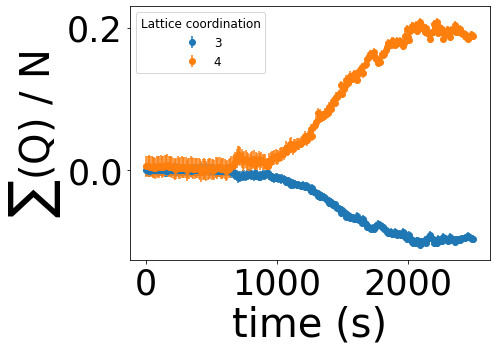

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

for typ_m, mtype in df.groupby('coordination'):
    
    plt.errorbar(mtype.index.get_level_values("time"), mtype["charge"],yerr = mtype['err'],fmt ='o', label = typ_m)
    #plt.plot(mtype.index.get_level_values("time"), mtype["charge"],'-', label = typ_m)

    
ax.tick_params(axis='y', labelsize=35)
ax.tick_params(axis='x', labelsize=35) 
ax.legend(fontsize = 12, title= 'Lattice coordination', title_fontsize = 12, ncol = 1)


ax.set_xlabel('time (s)', size = 40)
ax.set_ylabel('$\sum$(Q) / N', size = 40)


plt.tight_layout()
#plt.savefig('ChargeTransfer.png', bbox_inches='tight')